In [11]:
# BIA - business insight analyze. Tasks (1 - 16)
# This class will give us the opportunity not only to do in-depth data analysis, but also to make some business discoveries or conclusions for ourselves.

import pandas as pd

df = pd.read_csv('./data/fifa23_players.csv')

/tmp/ipykernel_9230/823719493.py:6: DtypeWarning: Columns (24,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/fifa23_players.csv')


In [12]:
import _sqlite3

#First of all, to more conveniently complete the first 7 tasks, let’s write our dataset into a database and use the 
# sql engine

connection = _sqlite3.connect('./data/fifa2023.db')
cursor = connection.cursor()

df.to_sql(con=connection, name='players', index=False, if_exists='replace')

def read_sql_to_data_frame(query):
    return pd.read_sql_query(query, connection)

In [13]:
# 1. Top 100 players with the highest rating.
read_sql_to_data_frame(query=
    '''select overall,
       long_name,
       age,
       dob,
       height_cm,
       weight_kg,
       club_name,
       club_position,
       club_jersey_number,
       player_positions,
       value_eur,
       wage_eur
from players
order by overall DESC
LIMIT 100;
''')

,overall,long_name,age,dob,height_cm,weight_kg,club_name,club_position,club_jersey_number,player_positions,value_eur,wage_eur
0,93,Lionel Andrés Messi Cuccittini,34,1987-06-24,170,72,Paris Saint-Germain,RW,30.0,"RW, ST, CF",78000000.0,320000.0
1,92,Robert Lewandowski,32,1988-08-21,185,81,FC Bayern München,ST,9.0,ST,119500000.0,270000.0
2,91,Cristiano Ronaldo dos Santos Aveiro,36,1985-02-05,187,83,Manchester United,ST,7.0,"ST, LW",45000000.0,270000.0
3,91,Neymar da Silva Santos Júnior,29,1992-02-05,175,68,Paris Saint-Germain,LW,10.0,"LW, CAM",129000000.0,270000.0
4,91,Kevin De Bruyne,30,1991-06-28,181,70,Manchester City,RCM,17.0,"CM, CAM",125500000.0,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,85,Achraf Hakimi Mouh,22,1998-11-04,181,73,Paris Saint-Germain,RB,2.0,"RB, RWB",69500000.0,100000.0
96,85,Matthijs de Ligt,21,1999-08-12,189,89,Juventus,LCB,4.0,CB,75000000.0,81000.0
97,84,Zlatan Ibrahimović,39,1981-10-03,195,95,AC Milan,SUB,11.0,ST,14500000.0,51000.0
98,84,Jesús Navas González,35,1985-11-21,172,60,Sevilla FC,RB,16.0,"RB, RM",13000000.0,30000.0


In [14]:
# 2. Top 100 players with the highest salaries. Compare with item 1
read_sql_to_data_frame(
    '''select wage_eur,
       overall,
       long_name,
       age,
       dob,
       height_cm,
       weight_kg,
       club_name,
       club_position,
       club_jersey_number,
       player_positions,
       value_eur
from players
order by wage_eur DESC
LIMIT 100;
''')

,wage_eur,overall,long_name,age,dob,height_cm,weight_kg,club_name,club_position,club_jersey_number,player_positions,value_eur
0,350000.0,91,Kevin De Bruyne,30,1991-06-28,181,70,Manchester City,RCM,17.0,"CM, CAM",125500000.0
1,350000.0,89,Karim Benzema,33,1987-12-19,185,81,Real Madrid CF,CF,9.0,"CF, ST",66000000.0
2,320000.0,93,Lionel Andrés Messi Cuccittini,34,1987-06-24,170,72,Paris Saint-Germain,RW,30.0,"RW, ST, CF",78000000.0
3,310000.0,89,Carlos Henrique Venancio Casimiro,29,1992-02-23,185,84,Real Madrid CF,CDM,14.0,CDM,88000000.0
4,310000.0,88,Toni Kroos,31,1990-01-04,183,76,Real Madrid CF,LCM,8.0,CM,75000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,130000.0,82,Éder Gabriel Militão,23,1998-01-18,186,78,Real Madrid CF,RCB,3.0,CB,56500000.0
96,130000.0,81,Anthony Martial,25,1995-12-05,184,76,Manchester United,SUB,9.0,"ST, LM",34500000.0
97,130000.0,79,Luka Jović,23,1997-12-23,182,85,Real Madrid CF,SUB,16.0,ST,27000000.0
98,125000.0,87,Hugo Lloris,34,1986-12-26,188,82,Tottenham Hotspur,GK,1.0,GK,13500000.0


In [15]:
# 3. Top 30 goalkeepers with the highest rating
read_sql_to_data_frame(
    '''select overall,
       long_name,
       age,
       dob,
       height_cm,
       weight_kg,
       club_name,
       club_position,
       club_jersey_number,
       player_positions,
       value_eur,
       wage_eur
from players p
where p.player_positions like '%GK%'
   or club_position = 'GK'
   or nation_position = 'GK'
order by overall DESC
limit 30;
''')

,overall,long_name,age,dob,height_cm,weight_kg,club_name,club_position,club_jersey_number,player_positions,value_eur,wage_eur
0,91,Jan Oblak,28,1993-01-07,188,87,Atlético de Madrid,GK,13.0,GK,112000000.0,130000.0
1,90,Manuel Peter Neuer,35,1986-03-27,193,93,FC Bayern München,GK,1.0,GK,13500000.0,86000.0
2,90,Marc-André ter Stegen,29,1992-04-30,187,85,FC Barcelona,GK,1.0,GK,99000000.0,250000.0
3,89,Thibaut Courtois,29,1992-05-11,199,96,Real Madrid CF,GK,1.0,GK,85500000.0,250000.0
4,89,Ederson Santana de Moraes,27,1993-08-17,188,86,Manchester City,GK,31.0,GK,94000000.0,200000.0
5,89,Alisson Ramsés Becker,28,1992-10-02,191,91,Liverpool,GK,1.0,GK,82000000.0,190000.0
6,89,Gianluigi Donnarumma,22,1999-02-25,196,90,Paris Saint-Germain,GK,50.0,GK,119500000.0,110000.0
7,88,Keylor Navas Gamboa,34,1986-12-15,185,80,Paris Saint-Germain,SUB,1.0,GK,15500000.0,130000.0
8,87,Hugo Lloris,34,1986-12-26,188,82,Tottenham Hotspur,GK,1.0,GK,13500000.0,125000.0
9,87,Wojciech Tomasz Szczęsny,31,1990-04-18,195,90,Juventus,GK,1.0,GK,42000000.0,105000.0


In [16]:
# 4. Top 30 teams with the highest-rated players.
read_sql_to_data_frame(
    '''select distinct (club_team_id),
                avg(overall) as players_rate_avarage,
                club_name
from players p
GROUP BY club_team_id, overall
order by overall DESC
limit 30;
''')

,club_team_id,players_rate_avarage,club_name
0,73.0,93.0,Paris Saint-Germain
1,21.0,92.0,FC Bayern München
2,10.0,91.0,Manchester City
3,11.0,91.0,Manchester United
4,73.0,91.0,Paris Saint-Germain
5,240.0,91.0,Atlético de Madrid
6,5.0,90.0,Chelsea
7,18.0,90.0,Tottenham Hotspur
8,21.0,90.0,FC Bayern München
9,241.0,90.0,FC Barcelona


In [17]:
# 5. Top 30 teams in which, on average, players have the highest speed 
read_sql_to_data_frame(
    '''WITH top_clubs as (select distinct club_name,
                avg(pace) pace_average,
                GROUP_CONCAT(' Position: ' || p.club_position ||'. Pace: ' || p.pace) players_pace
from players p
where club_name is not null
GROUP BY club_name)
select * from top_clubs order by pace_average DESC LIMIT 30
''')

,club_name,pace_average,players_pace
0,FC Red Bull Salzburg,76.640000,"Position: SUB. Pace: 70.0, Position: RB. Pace..."
1,New York Red Bulls,76.272727,"Position: SUB. Pace: 80.0, Position: SUB. Pac..."
2,SK Slavia Praha,75.800000,"Position: CAM. Pace: 72.0, Position: RCB. Pac..."
3,Paris Saint-Germain,75.724138,"Position: RW. Pace: 85.0, Position: LW. Pace:..."
4,Shakhtar Donetsk,75.640000,"Position: RM. Pace: 79.0, Position: LB. Pace:..."
5,Juventus,75.391304,"Position: CAM. Pace: 84.0, Position: SUB. Pac..."
6,São Paulo,75.333333,"Position: LS. Pace: 81.0, Position: CAM. Pace..."
7,Jeonbuk Hyundai Motors,75.320000,"Position: SUB. Pace: 77.0, Position: RCM. Pac..."
8,FC Porto,75.260870,"Position: LCB. Pace: 80.0, Position: SUB. Pac..."
9,Ajax,75.250000,"Position: LW. Pace: 69.0, Position: LB. Pace:..."


In [18]:
# 6. Top of all Leagues in which the best dribblers are collected. (dribbling)
read_sql_to_data_frame(
    '''with top_leagues as (select distinct (league_name), league_level, avg(dribbling) as dribbling_skill_average, max(dribbling) as max_dribbling_skill
from players
where dribbling >= (select avg(dribbling) from players)
  and (league_name is not null and league_level is not null)
GROUP BY league_name)
select * from top_leagues order by dribbling_skill_average DESC;
''')

,league_name,league_level,dribbling_skill_average,max_dribbling_skill
0,English Premier League,1.0,74.162037,91.0
1,Italian Serie A,1.0,73.571795,90.0
2,Spain Primera Division,1.0,73.343891,88.0
3,Ukrainian Premier League,1.0,73.058824,86.0
4,French Ligue 1,1.0,72.509333,95.0
5,German 1. Bundesliga,1.0,72.470430,88.0
6,Russian Premier League,1.0,71.739130,81.0
7,Czech Republic Gambrinus Liga,1.0,71.633333,80.0
8,Greek Super League,1.0,71.631579,82.0
9,Campeonato Brasileiro Série A,1.0,70.705394,84.0


In [19]:
# 7. Top 30 teams with the highest rated players including 1 goalkeeper, 4 defenders, 4 midfielders, 2 
# forwards
read_sql_to_data_frame(
    '''WITH top_clubs as (select distinct club_name,
                avg(overall) rate_average,
                count(p.sofifa_id) players_count,
                GROUP_CONCAT(' Position: ' || p.club_position ||'. Rate: ' || p.overall) as players_rate
from players p
where club_name is not null
  and club_position <> 'RES'
  and club_position <> 'SUB'
GROUP BY club_name)
select * from top_clubs order by rate_average DESC LIMIT 30
''')

,club_name,rate_average,players_count,players_rate
0,Paris Saint-Germain,87.181818,11,"Position: RW. Rate: 93, Position: LW. Rate: 9..."
1,Liverpool,86.727273,11,"Position: LCB. Rate: 89, Position: LW. Rate: ..."
2,Manchester City,86.090909,11,"Position: RCM. Rate: 91, Position: GK. Rate: ..."
3,Real Madrid CF,85.545455,11,"Position: CF. Rate: 89, Position: GK. Rate: 8..."
4,FC Bayern München,85.363636,11,"Position: ST. Rate: 92, Position: GK. Rate: 9..."
5,Manchester United,84.818182,11,"Position: ST. Rate: 91, Position: CAM. Rate: ..."
6,Atlético de Madrid,84.636364,11,"Position: GK. Rate: 91, Position: RS. Rate: 8..."
7,FC Barcelona,83.818182,11,"Position: GK. Rate: 90, Position: ST. Rate: 8..."
8,Juventus,83.636364,11,"Position: GK. Rate: 87, Position: CAM. Rate: ..."
9,Chelsea,83.363636,11,"Position: RCM. Rate: 90, Position: ST. Rate: ..."


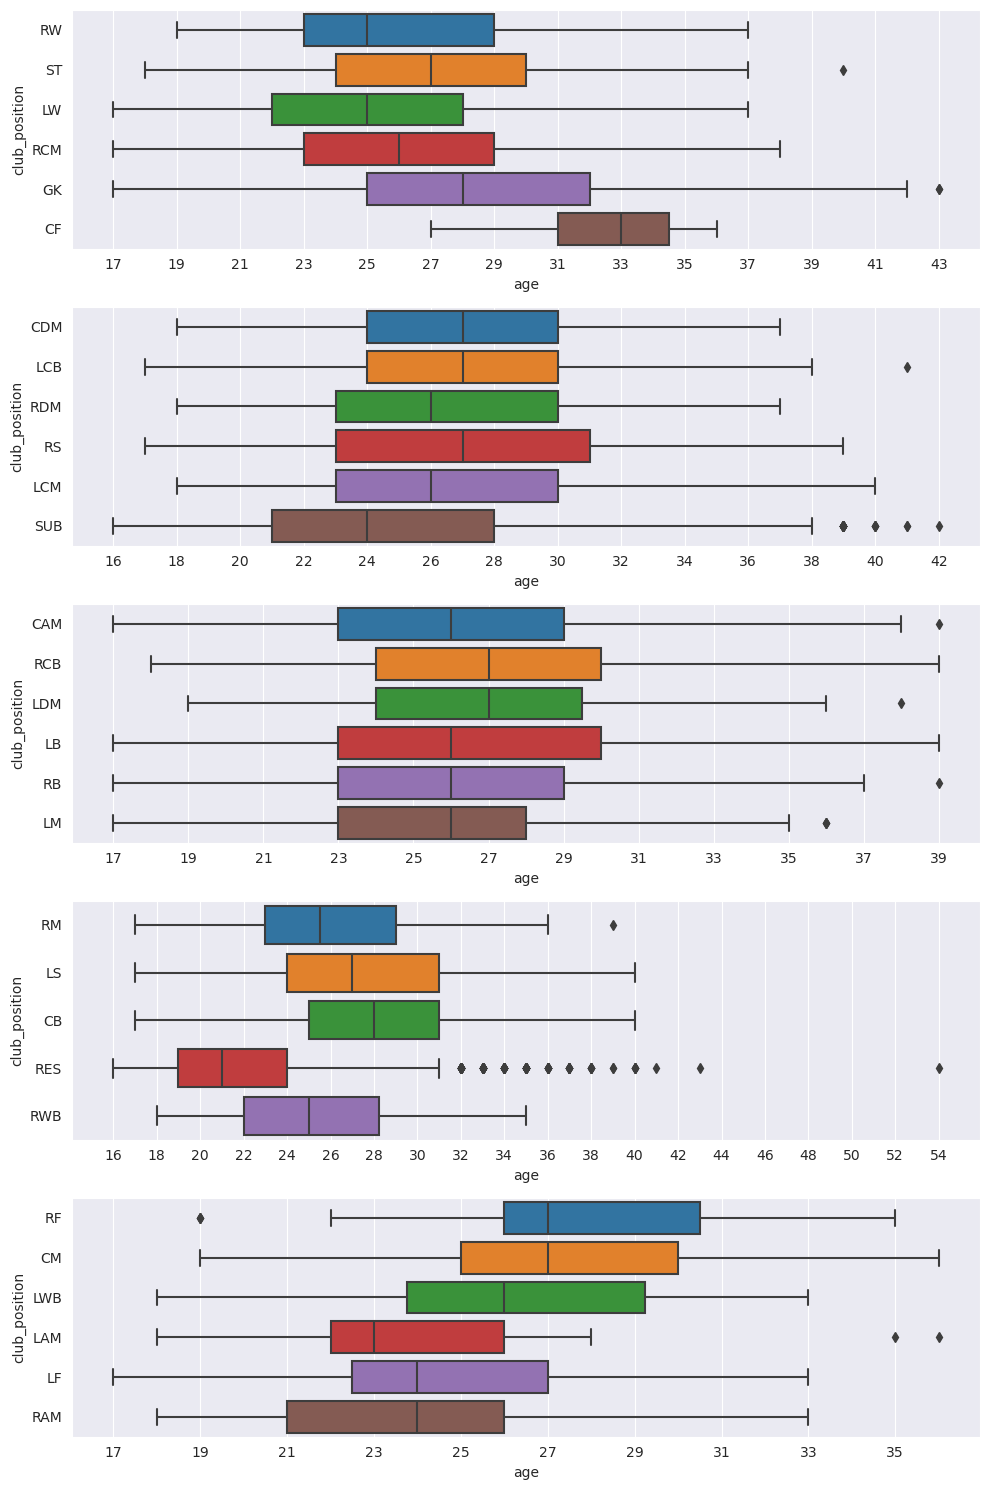

In [20]:
#There are a lot of values of club positions, And if we build diagram for all club positions, diagram will be unreadable
#Then we should to divide the full plot to sub-plots with axis customization. Boxplot will be the mos understandable diagram for this distribution

#This type of distribution diagram will allow us to understand the ranges of ratings for each of the player positions, as well as track candidates who fall out of the range
import seaborn as sns
import matplotlib.pyplot as plt

# Let's write a general custom function to visualize the distribution by age and rating for each position
def show_group_boxplot(group_count, graphic_count, y_, x_, data):
    positions = data[y_].unique()
    position_groups = [positions[i:i + group_count] for i in range(0, len(positions), group_count)]
    fig, axes = plt.subplots(nrows=graphic_count, ncols=1, figsize=(10, 15))
    for i, positions_subset in enumerate(position_groups):
        subset = data[data[y_].isin(positions_subset)]
        sns.boxplot(data=subset, x=x_, y=y_, ax=axes[i])
        axes[i].set_xticks(range(subset[x_].min(), subset[x_].max() + 1, 2))
    plt.tight_layout()
    plt.show()


#8. Diagram of the distribution of players by age by position.
show_group_boxplot(6, 5, 'club_position', 'age', df)

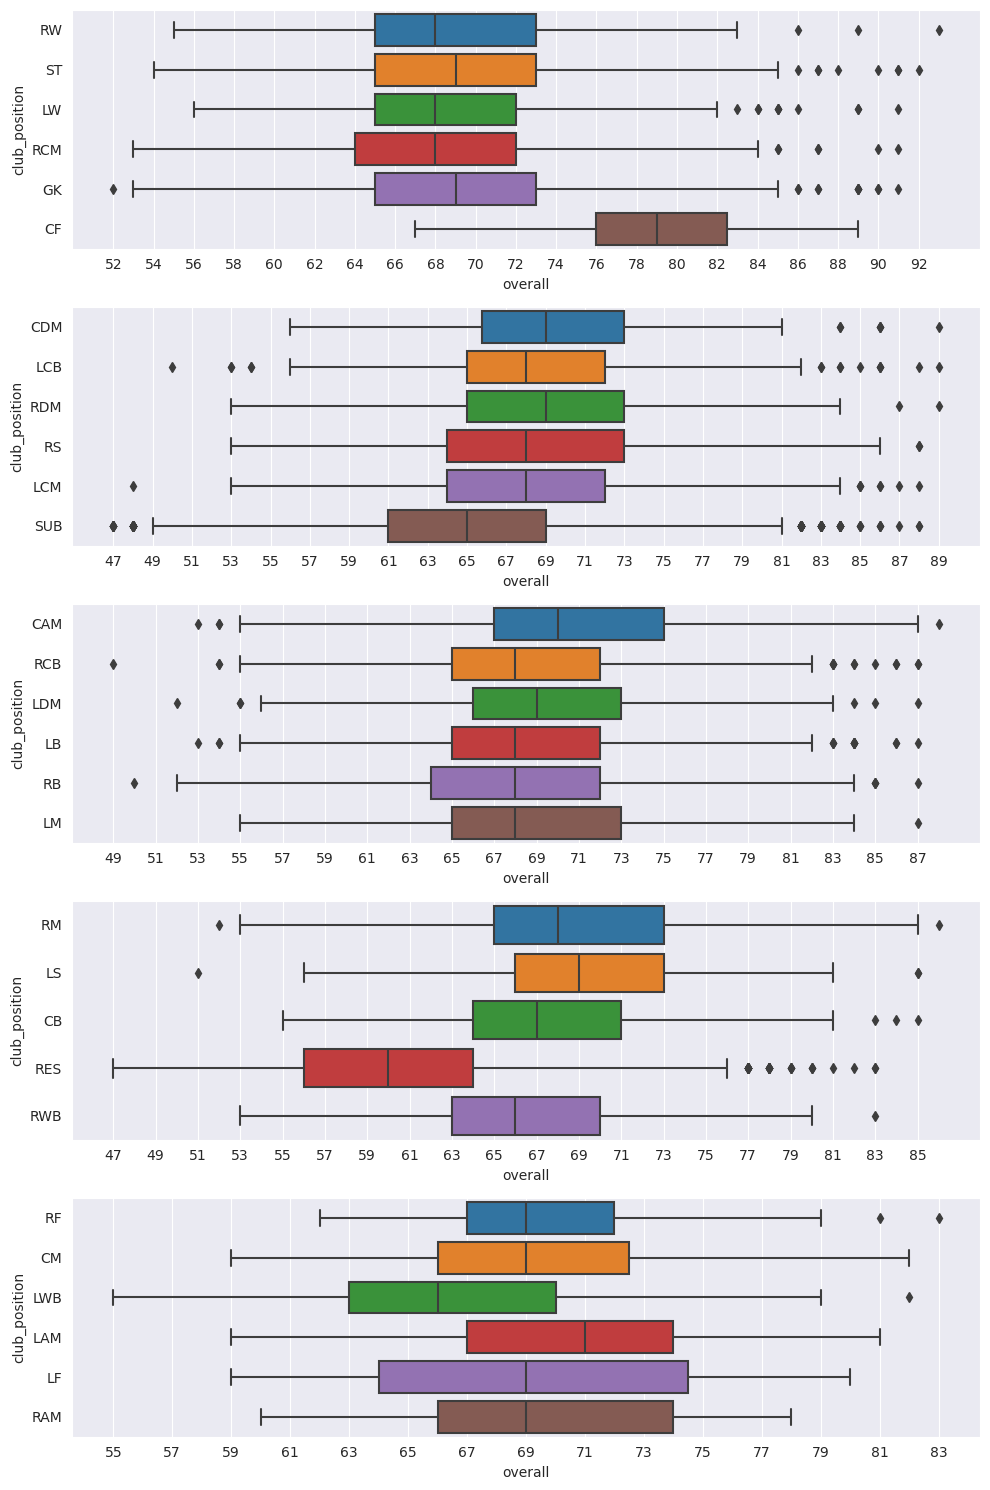

In [21]:
#9. Diagram of the distribution of players by overall by position.
show_group_boxplot(6, 5, 'club_position', 'overall', df)

In [22]:
#There are a lot of values of nationality name, And if we build diagram for all nationalities, diagram will be unreadable
#Then we should to divide the full select of nationality by frequency 

#And also on each diagram for each nationality we will draw a line of the average rating for the entire sample. This will give us an understanding of which nationality and 
# which number of players have an above-average rating. This analytics will provide significant insight into future player selections.

threshold = df['nationality_name'].value_counts().mean() - df['nationality_name'].value_counts().mean() * 0.20

low_frequency_nationalities = []
high_frequency_nationalities = []

for nationality in df['nationality_name'].unique():
    if df['nationality_name'].value_counts().loc[nationality] <= threshold:
        low_frequency_nationalities.append(nationality)
    else:
        high_frequency_nationalities.append(nationality)

high_frequency_nationalities_df = df[df['nationality_name'].isin(high_frequency_nationalities)]
low_frequency_nationalities_df = df[df['nationality_name'].isin(low_frequency_nationalities)]

In [23]:
#Let's write a general function to visualize low-frequency diagrams and high-frequency diagrams
def custom_hist_builder(data, x_name, categorical_var_name, title, x_average):

    def plot_hist_with_line(x, **kwargs):
        plt.hist(x, bins=40, color='blue', alpha=0.7, edgecolor='black', linewidth=1.2)
        plt.axvline(x=x_average, color='red', linestyle='--')

    g = sns.FacetGrid(data, col=categorical_var_name, col_wrap=3, height=5, sharex=False)
    g.map(plot_hist_with_line, x_name)
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels(x_name, "Frequency")
    plt.tight_layout()
    g.fig.suptitle(title, y=1.02)
    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


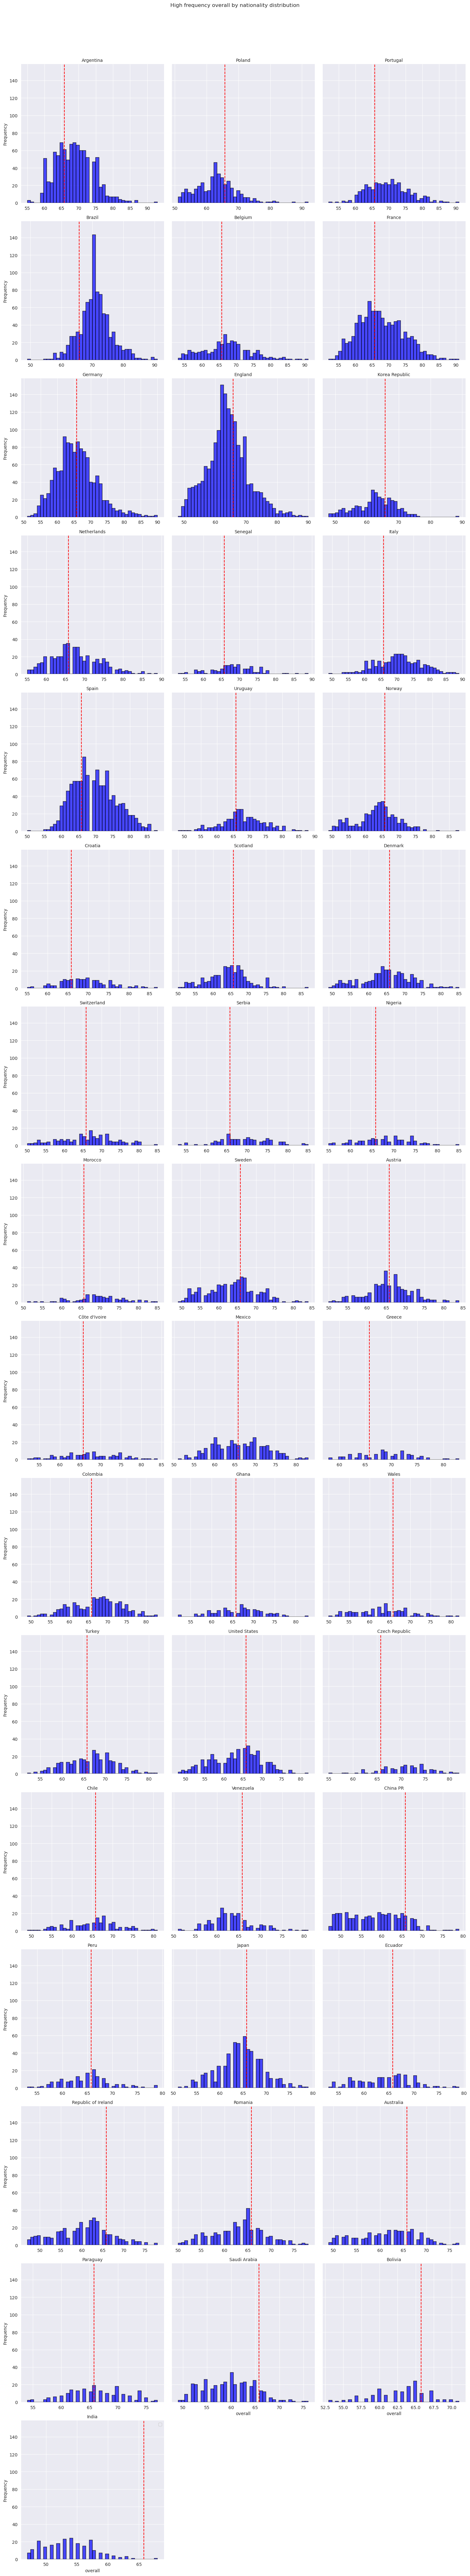

In [24]:
#10. Diagram of the distribution of nationalities based on the overall of players.
overall_average = df['overall'].mean()
custom_hist_builder(high_frequency_nationalities_df, 'overall', 'nationality_name', 'High frequency overall by nationality distribution', overall_average)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


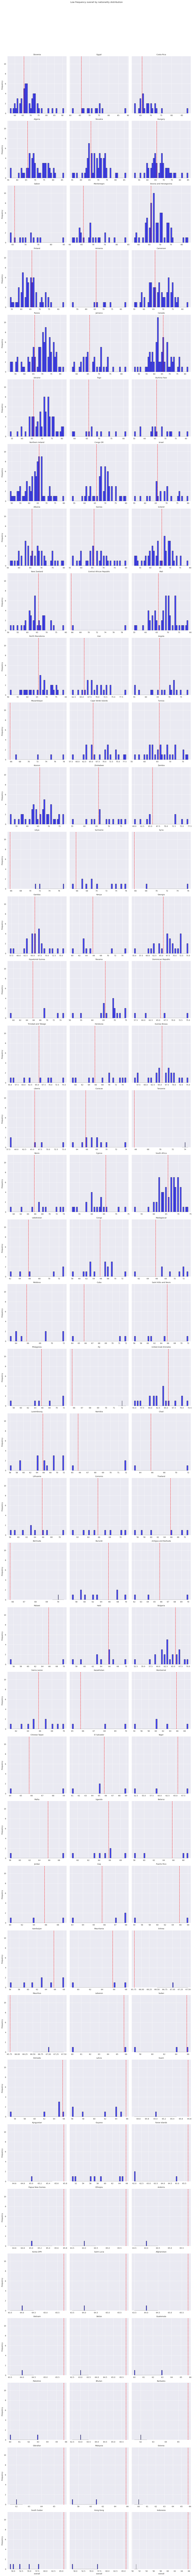

In [25]:
custom_hist_builder(low_frequency_nationalities_df, 'overall', 'nationality_name', 'Low frequency overall by nationality distribution', overall_average)

In [26]:
# 11. Come up with a metric to evaluate the penalty taker’s skill.
# 12. Come up with a metric to evaluate the skill of a goalkeeper who saves a penalty

# To assess the quality of a penalty taker or goalkeeper, first of all it is necessary to determine the list of 
# skills characteristic of a penalty taker and goalkeeper. It should also be noted that the goalkeeper cannot be a 
# penalty taker; Any half-team player can be a penalty taker, however, when evaluating a goalkeeper, I think it is 
# necessary to take into account the position of GK in the club_position or player_positions columns
# the  penalty taker can be any field player. From the data available in our dataset, we can identify the following 
# features:

# After selecting the necessary characteristics for each type of player, it makes sense to assign each feature its 
# own coefficient of weight (importance) and sum up all the values. This metric will allow us to collect information 
# on  the best penalty takers and goalkeepers. The coefficients will make it possible to weed out players who may 
# prevail based on non-target selected characteristics.


# For penalty taker:


# attacking_Finishing(Weight - 0.2) - this skill is important for accuracy and skill in scoring goals, which is 
# especially valuable when taking penalties.

# shooting(Weight - 0.2) - The ability to take accurate and powerful shots on goal, what is very important for 
# penalty taker

# pace(Weight - 0.025) - The player's speed and acceleration on the field. The player's overall speed will also play a 
# role in applying a stronger shot.

# movement_Acceleration(Weight - 0.05) - the speed at which a player reaches their top speed. Sufficient acceleration 
# will give the penalty taker the opportunity to apply more force to the kick

# power_Long_Shots(Weight - 0.2) - Ability to take powerful and accurate shots from a distance. It is obviously 
# necessary for penalty taker.

# power_Stamina(Weight - 0.005) - Endurance and stamina throughout the match.

# mentality_Composure(Weight - 0.02) - a player's calmness when taking a penalty can affect its accuracy and
# efficiency.

# mentality_Penalties(Weight - 0.3) - this skill is directly related to the skill of taking penalties.


# For goalkeeper (Necessary to collect all allowed goalkeeping skills except goalkeeping_Kicking, cause it is 
# useless in penalty defense):


# goalkeeping_Diving(Weight - 0.1) - Goalkeeper's ability to make diving saves. Important for making quick and 
# accurate drops to save penalties.

# goalkeeping_Handling(Weight - 0.05) - Skill in handling and securing the ball after a save. Knowing how to hold 
# onto the ball after making a save is important to prevent potential rebounds and re-hits.

# goalkeeping_Positioning(Weight - 0.1) - Proper positioning of the goalkeeper to cover the goal effectively. Proper 
# positioning of the goalkeeper in the goal can increase the likelihood of successfully defending penalty kicks. 

# goalkeeping_Reflexes(Weight - 0.3) - Quick reactions and reflexes in responding to shots. Fast reflexes are 
# necessary to deflect shots, especially from close range, such as when taking a penalty.

# goalkeeping_Speed(Weight - 0.3) - Swiftness in movement and decision-making for a goalkeeper to save penalty

# power_Jumping(Weight - 0.1) - Vertical jump height. The ability to jump high gives a greater chance to save a 
# penalty if the ball is high

# power_Stamina(Weight - 0.02) - Endurance and stamina throughout the match.

# mentality_Composure(Weight - 0.03) - Ability to stay calm and composed, especially under pressure. A goalkeeper's 
# calmness when defending a penalty can affect its successfully result.

In [53]:
# 14. Top 10 clubs with the best penalty takers.
penalty_takers_query = '''WITH club_penalty as (WITH penalty_takers_rate as (select club_name,
                                                          ((attacking_finishing * 0.2) + (shooting * 0.2) +
                                                           (pace * 0.025) + (movement_acceleration * 0.05) +
                                                           (power_long_shots * 0.2) + (power_stamina * 0.005) +
                                                           (mentality_composure * 0.02) +
                                                           (mentality_penalties * 0.3)) as penalty_quality
                                                   from players
                                                   where club_position <> 'GK')
                      select club_name, avg(penalty_quality) as penalty_players_quality_average
                      from penalty_takers_rate
                      group by club_name)
select *
from club_penalty
order by penalty_players_quality_average DESC
'''
all_penalty_takers = read_sql_to_data_frame(penalty_takers_query)
read_sql_to_data_frame(penalty_takers_query + 'LIMIT 10')


# Based on the assessment results, you can observe the result with fairly high-level world clubs. I also additionally checked 
# the data on Internet resources for top clubs with penalty takers, and most of it falls into the resulting result. From this we 
# can conclude that the metric gives a fairly good result.

,club_name,penalty_players_quality_average
0,Real Madrid CF,65.726667
1,Juventus,65.571739
2,Manchester United,64.626552
3,Inter,64.337500
4,SL Benfica,63.996154
5,Paris Saint-Germain,63.530000
6,Ajax,63.363958
7,FC Bayern München,63.186200
8,Sevilla FC,62.786897
9,PSV,62.771800


In [54]:
# 15. Top 10 clubs with the best goalkeepers.

goalkeepers_query =  '''WITH club_goalkeeper as (WITH goalkeepers_rate as (select club_name,
                                                          ((goalkeeping_diving * 0.1) + (goalkeeping_handling * 0.05) +
                                                           (goalkeeping_positioning * 0.1) + (goalkeeping_reflexes * 0.3) +
                                                           (goalkeeping_speed * 0.3) + (power_jumping * 0.1) +
                                                           (power_stamina * 0.02) +
                                                           (mentality_composure * 0.03)) as goalkeeping_quality
                                                   from players
                                                   where club_position == 'GK' or player_positions like '%GK%')
                      select club_name, avg(goalkeeping_quality) as goalkeeper_players_quality_average
                      from goalkeepers_rate
                      group by club_name)
select *
from club_goalkeeper
order by goalkeeper_players_quality_average DESC
'''
all_goalkeepers = read_sql_to_data_frame(goalkeepers_query)
read_sql_to_data_frame(goalkeepers_query + 'LIMIT 10')

# Based on the assessment results, you can observe the result with fairly high-level world clubs. I also additionally checked 
# the data on Internet resources for top clubs with the best goalkeepers. In this metric, a minority of clubs coincide with real 
# data. From this we can conclude that the metric gives a fairly good result, however, its result 
# may be affected by incorrect distribution of weights (coefficients of importance) as well as taking into account players from 
# the reserve who can play the role of goalkeeper. It is also worth noting that we focused on goalkeepers who save penalties, so 
# some general parameters that may be characteristic of goalkeepers were not taken into account.

,club_name,goalkeeper_players_quality_average
0,Tottenham Hotspur,71.980000
1,Juventus,69.166667
2,Paris Saint-Germain,68.107500
3,Real Sociedad,67.920000
4,Internacional,67.855000
5,Fulham,67.126667
6,Manchester City,67.093333
7,Udinese Calcio,66.910000
8,Bologna,66.515000
9,Real Betis Balompié,66.410000


<AxesSubplot:>

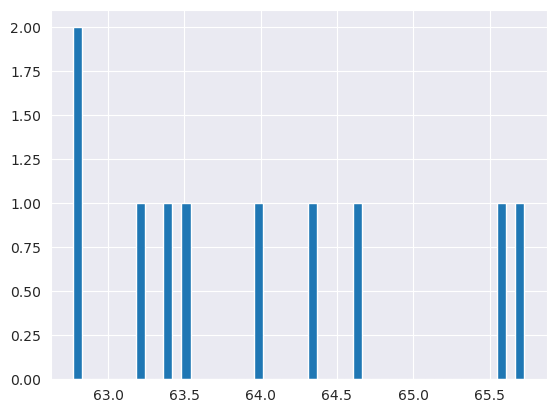

In [50]:
# 13. Are there any clubs where the penalty takers are significantly (find out what "substantially" means) better than the 
# goalkeepers who save? And vice versa?

# Considering that when creating the metric, we took into account only the sums of features, which are all in the range from 0 - 100 for 
# both goalkeepers and penalty takers, and then took their average for each club. Thanks to the central boundary theorem, statistically 
# we can compare these metrics and assert that they are normally distributed. Therefore, to understand if our clubs have any penalties




In [46]:
# 16. Describe a dataframe from a business perspective. What is useful in it? What can be explored? It is NOT necessary to do this, it 
# is enough to come up with an idea. (on the example of the tops and charts above)